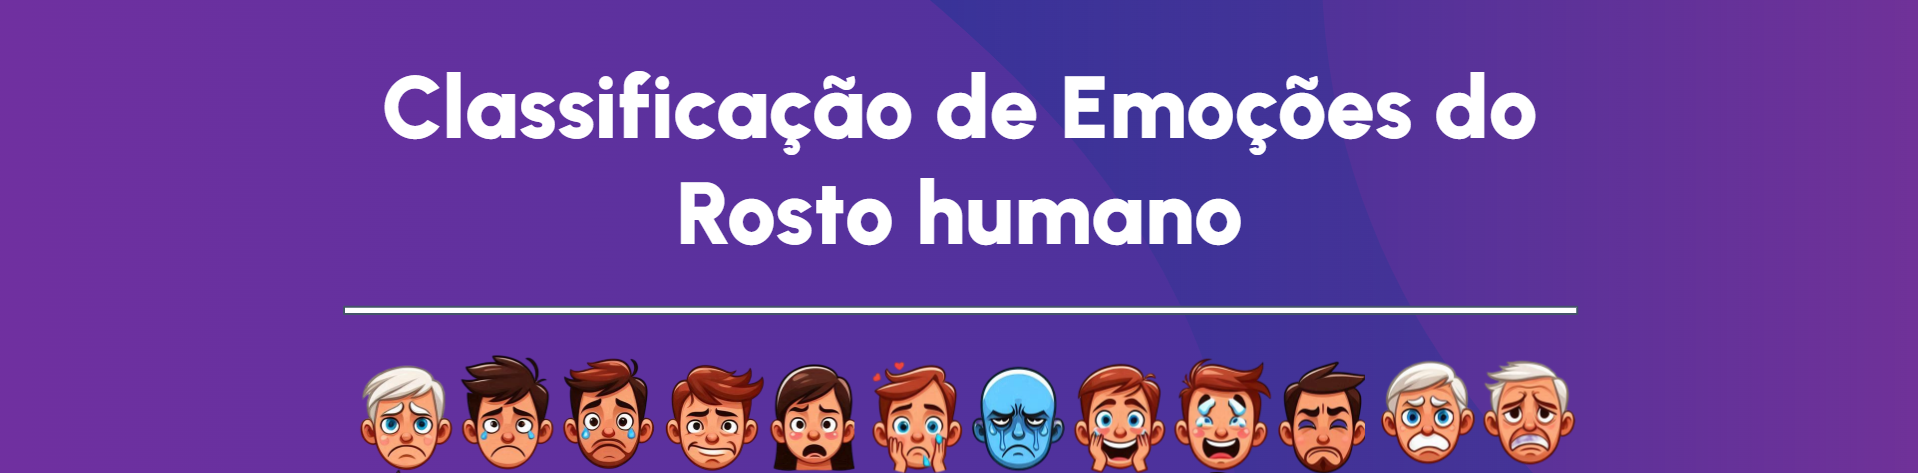


## Emoções do Rosto Humano

### Bibliotecas e Dependências

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def data_path(data_dir):
    data_path = []
    data_labels = []
    folds = os.listdir(data_dir)

    for fold in folds:
        fold_path = os.path.join(data_dir, fold)
        files = os.listdir(fold_path)

        for file in files:
            file_path = os.path.join(fold_path, file)
            data_path.append(file_path)
            data_labels.append(fold)

    Fseries = pd.Series(data_path, name= 'path')
    Lseries = pd.Series(data_labels, name='labels')

    return pd.concat([Fseries, Lseries], axis= 1)

def show_dataset(dataset):
    random_index = np.random.randint(0,len(dataset),16)

    fig, axes = plt.subplots(nrows=4,
                            ncols=4,figsize=(10,10),
                            subplot_kw={'xticks':[],'yticks':[]}
    )

    for i,ax in enumerate(axes.flat):
      img = plt.imread(dataset['path'].iloc[random_index[i]])
      ax.imshow(img)
      ax.set_title(dataset['labels'].iloc[random_index[i]])
    plt.tight_layout()
    plt.show()

In [ ]:
dataset = data_path('/content/drive/MyDrive/Avant Bootcamp_Base de Dados_Projeto/src/data/data-raw')

dataset

,path,labels
0,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Angry
1,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Angry
2,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Angry
3,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Angry
4,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Angry
...,...,...
241,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Sad
242,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Sad
243,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Sad
244,/content/drive/MyDrive/Avant Bootcamp_Base de ...,Sad


### Descrição

A base de dados é uma coleção de imagens de rostos humanos classificadas em diferentes expressões faciais. É ideal para treinar modelos que podem identificar e diferenciar emoções humanas a partir de imagens.


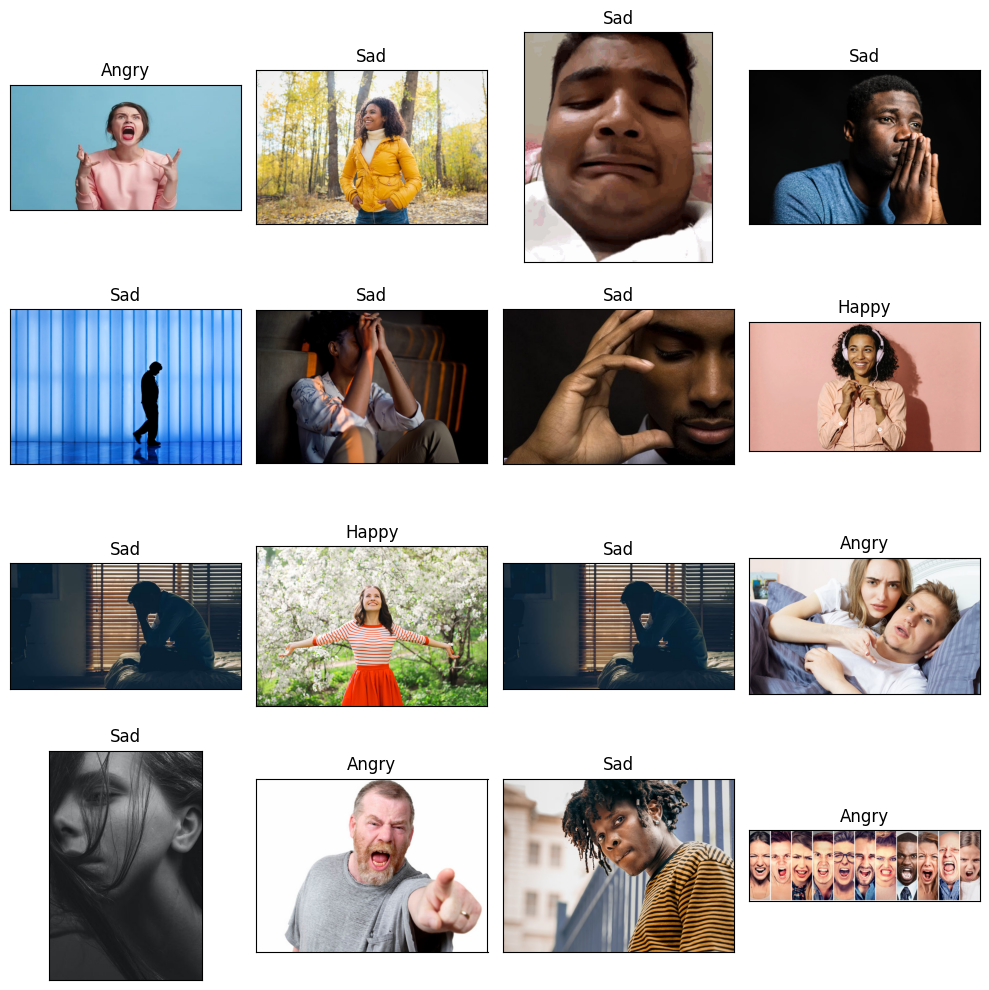

In [ ]:
show_dataset(dataset)

## Trabalhos Relacionados e Referências

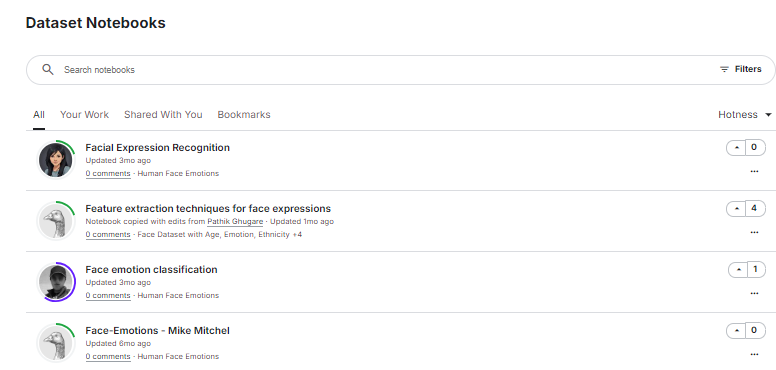



1.  [Transfer learning resnet50 image classification](https://www.kaggle.com/code/prashantverma13/transfer-learning-resnet50-image-classification)

  *Acurácia: 60,4%*

  Autor: Prashant Verma

2.  [Face emotions classification cnn and vgg16](https://www.kaggle.com/code/alexday11/face-emotions-classification-cnn-vgg16)
  
  *Acurácia: 50%*

  Autor: Alex

3.  [Human emotions efficientnetb0](https://www.kaggle.com/code/jovanchua/human-emotions-efficientnetb0)

  *Acurácia: 67%*
  
  Autor: Jovan Chua



## Transfer Learning ResnetBO image classification

#### Transfer Learning

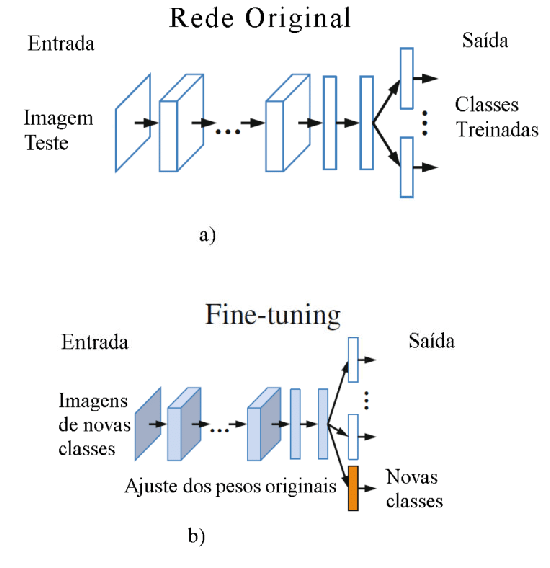


Um modelo pré-treinado é um modelo de aprendizado profundo que já foi treinado em um grande conjunto de dados por pesquisadores ou organizações para uma tarefa específica, como reconhecimento de imagens, processamento de linguagem natural ou detecção de objetos. Esses modelos são tipicamente treinados em hardware poderoso e em conjuntos de dados de grande escala por um período prolongado.

As principais características dos modelos pré-treinados são:

- **Aprendizado por Transferência**: Modelos pré-treinados servem como ponto de partida para novas tarefas de aprendizado de máquina, permitindo o uso de conhecimento já adquirido para resolver problemas relacionados, economizando tempo e dados.

- **Extração de Recursos**: Esses modelos são capazes de extrair características de baixo e alto nível dos dados, sendo úteis para identificar padrões e detalhes específicos em novos conjuntos de dados.

- **Arquiteturas de Modelos**: Modelos pré-treinados geralmente usam arquiteturas populares como VGG, ResNet e BERT, que foram refinadas para desempenho superior em diversas tarefas de aprendizado.

- **Disponibilidade**: Muitos modelos pré-treinados estão acessíveis em frameworks como TensorFlow e PyTorch, facilitando a implementação em projetos e democratizando o acesso a tecnologias avançadas de aprendizado profundo.

- **Vantagem para a Comunidade**: Modelos pré-treinados aceleram a solução de problemas complexos, promovem o aprendizado por transferência e tornam modelos sofisticados acessíveis a desenvolvedores e pesquisadores.





#### Caracarterística do trabalho

Vantagens:
  - Configura um pipeline completo para treinamento e avaliação de um modelo de deep learning usando PyTorch.
  - Define um dataset personalizado
  - Define funções para treinar e avaliar o modelo
  - Utiliza métricas para acompanhar o desempenho durante o processo.



Modelo EfficientNet_B0:
  - Uma variante da arquitetura EfficientNet, desenvolvidas para alcançar um equilíbrio ótimo entre precisão e eficiência computacional.
  - Introduzida pela equipe do Google AI em 2019
  - Design é baseado em um método de dimensionamento composto que ajusta uniformemente a profundidade, largura e resolução de imagem da rede para obter melhor desempenho.

EfficientNey_BO

  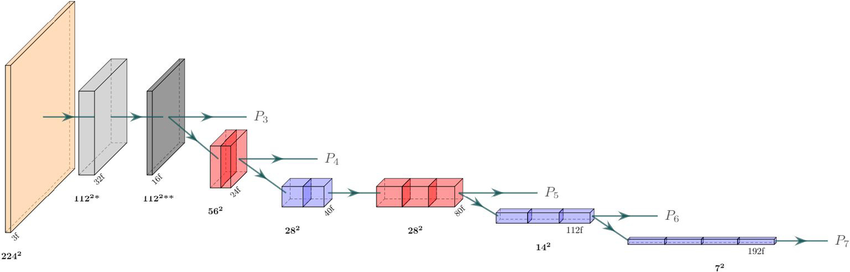

#### Bibliotecas e dependências

##### Dependências

In [ ]:
!pip install torchinfo
!pip install torchmetrics


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

##### Bibliotecas

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torchvision
from torchinfo import summary
import torchmetrics
from PIL import Image
import torch.optim as optim
import numpy as np
import pandas as pd
from pathlib import Path
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

#### Ambiente e EfficientNet

In [ ]:
# Configuração do Dispositivo
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Métrica de Acurácia
accuracy_metric = torchmetrics.Accuracy(task = 'multiclass', num_classes = 3).to(device)

# Carregamento de Pesos Pré-treinados
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

#### Etapas de Treino e Teste

Processo de Treinamento:
  
  1. Coloca o modelo em modo de treinamento (model.train()).
  
  2. Para cada batch de dados no DataLoader, realiza:
    - Forward pass: Calcula as previsões (logits).
    - Cálculo da Loss: Usa a função de perda (criterion) para calcular o erro.
    - Backpropagation: Calcula os gradientes e ajusta os pesos.
    - Atualização de Métricas: Calcula e acumula a loss e a acurácia.
A loss e a acurácia médias são calculadas e impressas ao final da época.

Processo de Avaliação:

- Coloca o modelo em modo de avaliação (model.eval()).
- Desativa o cálculo de gradientes para economizar memória e acelerar a inferência (with torch.inference_mode()).
- Para cada batch de dados no DataLoader, realiza:
   - Forward pass: Calcula as previsões.
   - Cálculo da Loss e Acurácia: Usa a função de perda e a métrica de acurácia.
   - A loss e a acurácia médias são calculadas e impressas ao final da avaliação.

##### Modulos

In [ ]:
# Define uma classe personalizada para carregar imagens e seus respectivos rótulos a partir de um DataFrame
class CustomImageDataset(Dataset):
    def __init__(self, df, transform = None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.df.loc[idx, 'path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.loc[idx, 'labels']

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

# Função de Treinamento
def train_step(model: torch.nn.Module,
         data_loader: torch.utils.data.DataLoader,
         criterion: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         accuracy_fn: torchmetrics.Accuracy,
         device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.train()
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = criterion(logits, y)
        train_loss += loss.item()

        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

# Função de Teste
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              criterion: torch.nn.Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_logits = model(X)

            # 2. Calculate loss and accuracy
            test_loss += criterion(test_logits, y)
            preds = test_logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


#### Código

In [ ]:
# Divisão dos dados entre treino e validação
X_tr, X_val, y_tr, y_val = train_test_split(dataset['path'], dataset['labels'], test_size = 0.2, shuffle = True, random_state = 42)
tr, val = pd.concat([X_tr, y_tr], axis = 1).reset_index(drop = True), pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)

In [ ]:
# Tranformação dos classes em atributo numérico
label_to_int = {label: i for i, label in enumerate(tr.labels.unique())}
tr.labels = tr.labels.map(label_to_int)
val.labels = val.labels.map(label_to_int)

In [ ]:
val

,path,labels
0,/content/drive/MyDrive/Avant Bootcamp_Base de ...,2
1,/content/drive/MyDrive/Avant Bootcamp_Base de ...,2
2,/content/drive/MyDrive/Avant Bootcamp_Base de ...,1
3,/content/drive/MyDrive/Avant Bootcamp_Base de ...,0
4,/content/drive/MyDrive/Avant Bootcamp_Base de ...,0
5,/content/drive/MyDrive/Avant Bootcamp_Base de ...,1
6,/content/drive/MyDrive/Avant Bootcamp_Base de ...,1
7,/content/drive/MyDrive/Avant Bootcamp_Base de ...,0
8,/content/drive/MyDrive/Avant Bootcamp_Base de ...,2
9,/content/drive/MyDrive/Avant Bootcamp_Base de ...,1


os pesos pré-treinados da EfficientNet_B0 são carregadas automaticamente. Essas transformações geralmente incluem redimensionamento, normalização, e outras operações que ajudam a preparar as imagens para o modelo.

In [ ]:
# Transformações Automáticas de Imagem
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

Datasets de Treinamento e Validação:

utilizando as transformações automáticas auto_transforms

In [ ]:
train = CustomImageDataset(tr, transform = auto_transforms)
valid = CustomImageDataset(val, transform = auto_transforms)

DataLoaders são criados para carregar os dados em batches, o que facilita o treinamento em mini-batches de tamanho 32

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)

val_loader = DataLoader(valid, batch_size=BATCH_SIZE)

Inicialização do Modelo EfficientNet_B0:

O modelo EfficientNet_B0 é instanciado com os pesos pré-treinados.

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Congelamento de Camadas:

Todas as camadas nas features do modelo são congeladas, o que significa que seus parâmetros não serão atualizados durante o treinamento. Isso é útil para transfer learning, onde apenas as últimas camadas do modelo são treinadas para se ajustar ao novo conjunto de dados.

In [ ]:
for param in model.features.parameters():
    param.requires_grad = False


Modificação da Camada de Classificação:

A última camada de classificação é substituída por uma nova camada Linear com 1280 neurônios de entrada (provenientes da camada anterior do EfficientNet_B0) e 3 neurônios de saída, correspondendo às 3 classes do problema de classificação.

In [ ]:
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=3,
                    bias=True)).to(device)

for param in model.features[8].parameters():
    param.requires_grad = True

summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   Partial
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32

Definição da Função de Perda e Otimizador:

 -  Função de Perda: A função de perda CrossEntropyLoss é usada, adequada para problemas de classificação multiclasse.

- Otimizador: O otimizador Adam é configurado para ajustar os parâmetros do modelo com uma taxa de aprendizado (lr) de 0.001.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 20
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(data_loader=val_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

Epoch: 0
---------
Train loss: 1.02943 | Train accuracy: 0.51%
Test loss: 0.90412 | Test accuracy: 0.56%

Epoch: 1
---------
Train loss: 0.73483 | Train accuracy: 0.74%
Test loss: 0.76880 | Test accuracy: 0.74%

Epoch: 2
---------
Train loss: 0.54129 | Train accuracy: 0.81%
Test loss: 0.67089 | Test accuracy: 0.73%

Epoch: 3
---------
Train loss: 0.43293 | Train accuracy: 0.90%
Test loss: 0.63564 | Test accuracy: 0.70%

Epoch: 4
---------
Train loss: 0.35312 | Train accuracy: 0.92%
Test loss: 0.62396 | Test accuracy: 0.72%

Epoch: 5
---------
Train loss: 0.29912 | Train accuracy: 0.94%
Test loss: 0.66314 | Test accuracy: 0.68%

Epoch: 6
---------


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Avant Bootcamp_Base de Dados_Projeto/src/data/data-ready/Angry/angry-customer-86255098-760.jpg'

## Oportunidades de Melhoria


1.   **Limpeza dos Dados:**

  *   **Descrição**: remover as imagens duplicadas e de baixa qualidade pode melhorar  a qualidade do conjunto de dados.

  *   **Impacto:** manter as imagens duplicadas e de baixa qualidade pode introduzir ruído e confundir o modelo, reduzindo assim a acurácia. Limpar o conjunto de dados pode ajudar o modelo a aprender padrões mais relevantes e generalizar melhor para novos dados.


2.   **Ampliar o Conjunto de Dados:**

  *   **Descrição:** incluir mais imagens em diferentes cenários e contextos pode enriquecer o conjunto de dados com uma visão mais completa da diversidade de emoções faciais.
    *   **Impacto:** um conjunto de dados mais amplo pode ajudar o modelo a aprender a distinguir melhor entre diferentes emoções, o que pode melhorar a acurácia geral.


3.  **Balanceamento das Classes:**

  *   **Descrição:** equilibrar a quantidade de imagens entre as classes menos representadas pode prevenir o viés do modelo em favor das classes mais comuns.
  *   **Impacto:** quando o conjunto de dados é desequilibrado, o modelo pode se tornar enviesado em relação às classes mais frequentes. Balancear as classes pode levar a uma melhoria na acurácia das classes menos representadas e proporcionar uma avaliação mais justa do desempenho do modelo.


4.   **Redução na Dimensão das Imagens:**

  *   **Descrição:** ajustar a dimensão das imagens pode ajudar a reduzir o tempo de treinamento e melhorar a eficiência do modelo sem comprometer a qualidade dos dados.
  *  **Impacto:** Imagens de alta resolução podem aumentar o tempo de treinamento e os requisitos computacionais. Reduzir a dimensão das imagens para um tamanho adequado pode acelerar o treinamento no modelo.
